<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/master/Batch%20Normalization%20%26%20Regularization/NormalizationAndRegularizationOnMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normalization and Regularization on MNIST 

#### In the notebook, on MNIST digits classification example, we will try the effects of performing

*   Image normalization
*   L2 regularization
*   ReLU after BN
*   Early stopping with accuracy


### Importing Libraries

In [0]:
import os
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
def plot_images(pixels, indexes, labels=None, image_size=(28, 28)):
    """Given a dataset, its labels (if they exist)
    and the indexes to plot, plots the image(s)."""
    
    plots_num = len(indexes)
    current_plot = 1
    for idx in indexes:
        image = pixels[idx].reshape(image_size)
        ax = plt.subplot(1, plots_num, current_plot)
        ax.imshow(image, cmap=plt.get_cmap('gray'))
        label = -1 if labels is None else labels[idx]
        ax.set_title("label:%i" %label)
        current_plot +=1
    plt.show()

### Preparing Dataset 

In [0]:
(trainX, trainY), (testX, testY) = mnist.load_data()


In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(60000, 28, 28)


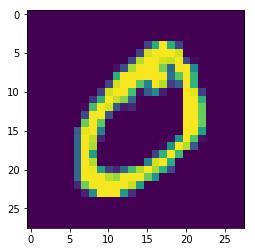

In [43]:
print (trainX.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(trainX[1])

In [0]:
trainX = trainX.reshape(trainX.shape[0], 28, 28,1)
testX = testX.reshape(testX.shape[0], 28, 28,1)

In [0]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX /= 255
testX /= 255

In [0]:
trainY[:10]
trainY = np_utils.to_categorical(trainY, 10)
testY = np_utils.to_categorical(testY, 10)

In [0]:
# applying transformation to image
train_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
test_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit the data augmentation
train_gen.fit(trainX)
test_gen.fit(testX)


In [0]:
training_set= train_gen.flow(trainX, trainY, batch_size=128)
testing_set= test_gen.flow(testX, testY, batch_size=128)

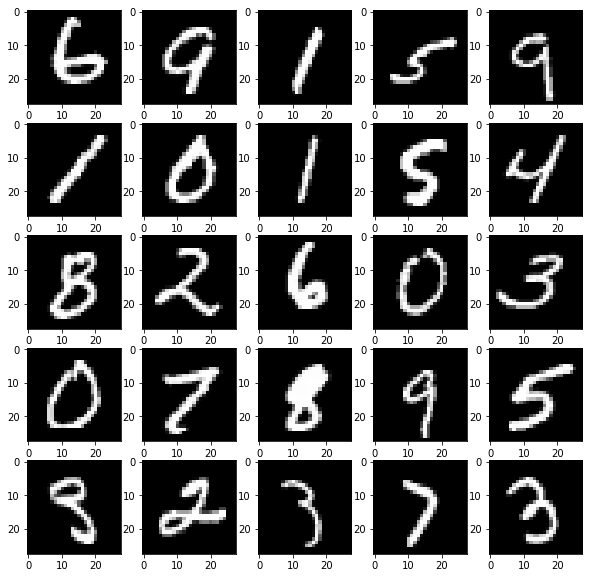

In [50]:
# Quick look at the some resulting images
plt.gcf().set_size_inches(10, 10)
for x_batch, y_batch in training_set:
    for i in range(0, 25):
        plt.subplot(5, 5, i+1)
        plt.imshow(x_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    break

In [51]:
trainY[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Creating Model

In [52]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, (3, 3), input_shape=(28,28,1), use_bias=False)) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Activation('relu'))

model.add(Convolution2D(16, (3, 3), use_bias=False)) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Activation('relu'))

model.add(Convolution2D(10, 1, 1, activation='relu', use_bias=False)) #22
model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, (3, 3), use_bias=False))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Activation('relu'))


model.add(Convolution2D(16, (3, 3), use_bias=False))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Activation('relu'))


model.add(Convolution2D(16, (3, 3), use_bias=False))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Activation('relu'))


model.add(Convolution2D(16, (3, 3), use_bias=False))#3
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Activation('relu'))


model.add(Convolution2D(10, 4, 4, use_bias=False))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", use_bias=False)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_8 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
activation_8 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        2304      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 24, 16)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4), use_bias=False)`


In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)               
                         

In [0]:
# checkpoint
#outputFolder = '/content/gdrive/My Drive/NormalizationAndRegularizationOnMNIST'

filepath="/content/drive/My Drive/NormalizationAndRegularizationOnMNIST/weights-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [0]:
# define early stopping callback
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=5, \
                          verbose=1, mode='auto')

In [61]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
callbacks_list = [earlystop, checkpoint, LearningRateScheduler(scheduler, verbose=1)]
#model.fit(trainX, trainY, batch_size=128, epochs=20, verbose=1, validation_data=(testX, testY), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
model.fit_generator(training_set, steps_per_epoch=60000//128,  validation_data= testing_set, validation_steps=10000//128, epochs=5, callbacks=callbacks_list)
                        
          

Epoch 1/5

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
468/468 [==============================] - 10s 21ms/step - loss: 0.1221 - acc: 0.9505 - val_loss: 6.7210 - val_acc: 0.1135

Epoch 00001: val_acc did not improve from 0.48090
Epoch 2/5

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
468/468 [==============================] - 7s 15ms/step - loss: 0.1103 - acc: 0.9534 - val_loss: 6.4808 - val_acc: 0.1138

Epoch 00002: val_acc did not improve from 0.48090
Epoch 3/5

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
468/468 [==============================] - 7s 15ms/step - loss: 0.1059 - acc: 0.9530 - val_loss: 5.7760 - val_acc: 0.1143

Epoch 00003: val_acc did not improve from 0.48090
Epoch 4/5

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
468/468 [==============================] - 7s 15ms/step - loss: 0.1007 - acc: 0.9550 - val_loss: 5.8348 - val_acc: 0.0985

Epoch 00004: val_acc did

In [57]:
te_ex, te_pixels = testX.shape[0]
sqrt_dim = int(np.sqrt(te_pixels))
test_data_normalized = (testX * 1./255).reshape((te_ex, sqrt_dim, sqrt_dim, channel))
predictions = model.predict(test_data_normalized)

TypeError: ignored